### Song based sentiment analysis using Textblob

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Samaras Laptop
#song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\DIE_DATEN\datensatz.csv')
#song_data = song_data[(song_data['Language'] == 'en')]
#song_data.to_csv("outData.csv", index=False)
#song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\outData.csv')


#Anjas Laptop
# song_data = pd.read_csv('../Daten/train.csv')
# song_data = song_data[(song_data['Language'] == 'en')]
# song_data.to_csv("../Daten/outData.csv", index=False)
song_data = pd.read_csv('../Daten/cleanedData.csv')

## Get a balanced sample of n songs per genre

In [3]:
num_genres = song_data.Genre.nunique()
num_topics = num_genres

In [4]:
song_data = song_data[["Genre", "Lyrics"]]
song_data = song_data.groupby('Genre').sample(200).reset_index(drop=True)
song_data.head(10)

,Genre,Lyrics
0,Country,I WON'T HAVE TO CROSS JORDAN ALONE (Thomas Ram...
1,Country,Gather round fellows I'll tell you some tales ...
2,Country,Seeing your face in every child that smiles Bu...
3,Country,I'm not worry cause I know I'll forget you in ...
4,Country,My cleaning lady is amish if you don't know wh...
5,Country,I went out to walk At the end of the night Awa...
6,Country,Praise him praise him Jesus our blessed redeem...
7,Country,"Jesus Christ, with signs followin', serpents i..."
8,Country,Someday when I'm old I'll pull up to the store...
9,Country,"Walk round town, spending my money, thinking a..."


## Remove punctuation/lower casing

In [5]:
song_data_processed = song_data.copy()
song_data_processed['Lyrics'] = song_data_processed['Lyrics'].map(lambda x: re.sub('[,\.!?]', '', x))
song_data_processed['Lyrics'] = song_data_processed['Lyrics'].map(lambda x: x.lower())

## Remove stopwords and Tokenize

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anjan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
song_data_processed['Sentiment'] = song_data_processed['Lyrics'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
song_data_processed['Subjectivity'] = song_data_processed['Lyrics'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

In [8]:
song_data_processed

,Genre,Lyrics,Sentiment,Subjectivity
0,Country,i won't have to cross jordan alone (thomas ram...,0.000000,0.011111
1,Country,gather round fellows i'll tell you some tales ...,0.228571,0.442857
2,Country,seeing your face in every child that smiles bu...,-0.042398,0.654094
3,Country,i'm not worry cause i know i'll forget you in ...,0.700000,0.800000
4,Country,my cleaning lady is amish if you don't know wh...,-0.139286,0.480556
...,...,...,...,...
1995,Rock,(spoken)\nkg: jack do you think some people do...,0.250000,0.325714
1996,Rock,live baby live\nnow that the day is over\ni go...,0.145443,0.529186
1997,Rock,well the mail don't come and the phone don't r...,0.103125,0.650000
1998,Rock,[the time has returned to the opening scene\nw...,0.003016,0.420990


### Explore the results

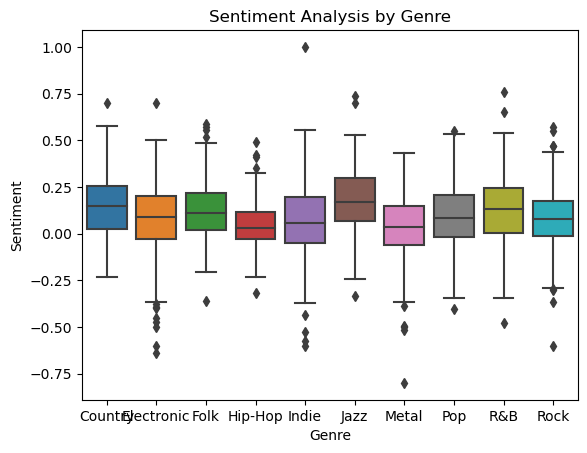

In [9]:
sns.boxplot(x='Genre', y='Sentiment', data=song_data_processed)
plt.title('Sentiment Analysis by Genre')
plt.show()

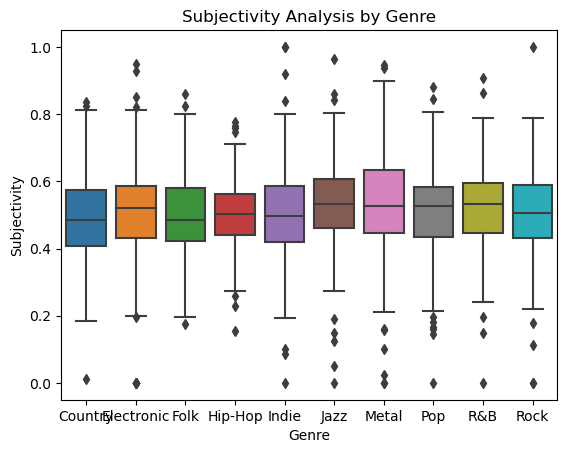

In [10]:
sns.boxplot(x='Genre', y='Subjectivity', data=song_data_processed)
plt.title('Subjectivity Analysis by Genre')
plt.show()

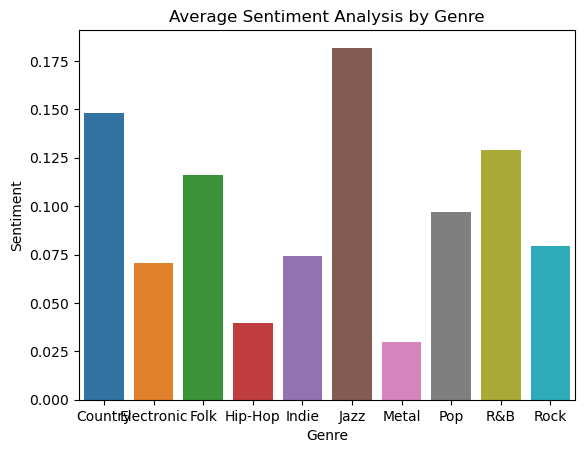

In [11]:
sns.barplot(x='Genre', y='Sentiment', data=song_data_processed, errorbar=None)
plt.title('Average Sentiment Analysis by Genre')
plt.show()

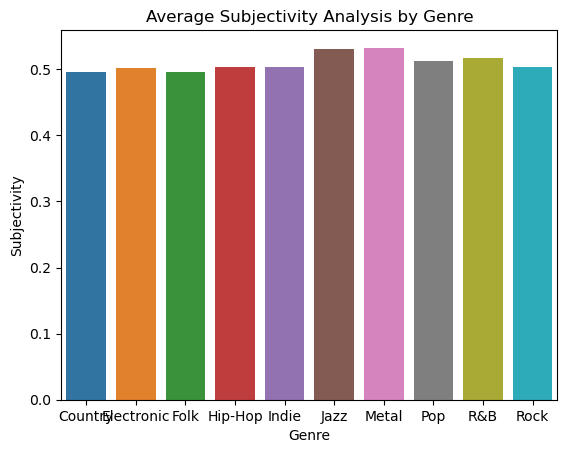

In [12]:
sns.barplot(x='Genre', y='Subjectivity', data=song_data_processed, errorbar=None)
plt.title('Average Subjectivity Analysis by Genre')
plt.show()

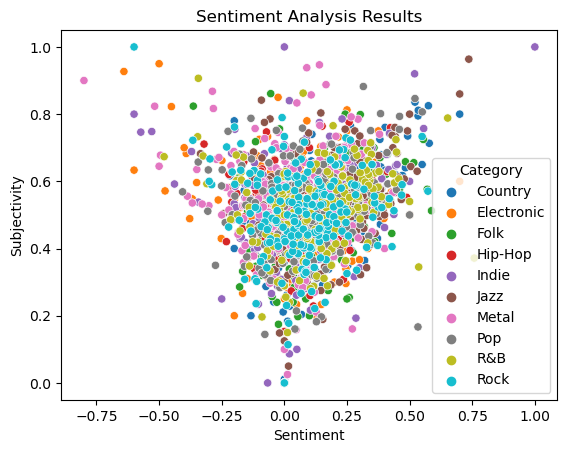

In [13]:
#Scatter Plot
sns.scatterplot(x='Sentiment', y='Subjectivity', hue='Genre', data=song_data_processed)
plt.title('Sentiment Analysis Results')
plt.legend(title='Category')
plt.show()

## Trying classification

In [14]:
X = song_data_processed[["Sentiment", "Subjectivity"]]
label_encoder = LabelEncoder()
song_data_processed["GenreID"] = label_encoder.fit_transform(song_data_processed["Genre"])
y = song_data_processed["GenreID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
#K-nearest neighbors
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.13833333333333334

In [24]:
#svm classifier
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.14666666666666667

In [28]:
#Random forest
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.14833333333333334

### Get Classification Matrix (of random forest)

In [29]:
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.08      0.10      0.09        52
           1       0.16      0.16      0.16        69
           2       0.22      0.15      0.18        72
           3       0.22      0.24      0.23        55
           4       0.17      0.20      0.18        54
           5       0.11      0.14      0.12        49
           6       0.16      0.16      0.16        57
           7       0.11      0.10      0.10        62
           8       0.15      0.14      0.14        64
           9       0.13      0.11      0.12        66

    accuracy                           0.15       600
   macro avg       0.15      0.15      0.15       600
weighted avg       0.15      0.15      0.15       600



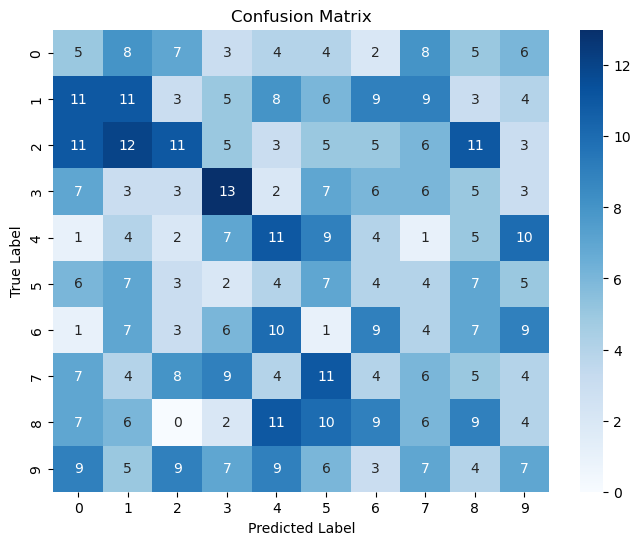

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Get the class labels
class_labels = rf.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
song_data_processed[["Genre", "GenreID"]].drop_duplicates()

,Genre,GenreID
0,Country,0
200,Electronic,1
400,Folk,2
600,Hip-Hop,3
800,Indie,4
1000,Jazz,5
1200,Metal,6
1400,Pop,7
1600,R&B,8
1800,Rock,9


### Was hier gemacht wurde:
- Nehmen eines song subsets mit jeweils n songs aus jedem der m genres
- Bereinigen der Lyrics mit verschiedenen Preprocessing methoden (Best Practice)
- Anwendung der sentiment analyse mithilfe der python textblob bibliothekt (Ergebnis in form von polarity & subjectivity)
- Investigating whether there is a correlation between the sentiments and the song genres, using boxplots, barcharts and Scatterplots
- Investigating whether it is possible to predict a genre based on its sentiments

### Ergebnis
- Die meisten songgenres können grundsätzlich positive als auch negative grundsentiments haben
- vor allem Metall und HipHop sind tendenziell eher negativer (was erwartungsgemäß ist), dieser unterschied ist jedoch nicht extrem groß
- Tendenziell sind song sentiments eher positiv
- Im bezug auf subjektivität sind die meisten songs eher neutral (und auch ähnlich neutral)
- Der Scatterplot zeigt, dass durch Sentiment und Subjektivität alleine keine differenzierung der songgenres möglich ist
- Dieses Ergebnis wird bestätigt durch die Anwendung verschiedener Klassifikationsverfahren, die maximal eine accuracy von 0.14 haben
- Bei Betrachtung der Confusion Matrix und des classification reports wird auch hier sichtbar, dass HipHop am besten predicted werden kann. Warum das so ist, kann allein durch betrachtung der Sentiment Analysis Daten allerdings nicht genau ermittelt werden.

### Interpretation
- Obwohl wenige genres tendenziell negativer sind, kann man grundsätzlich vom Song basierten sentiment nicht auf die gesamtheit eines genres schließen. dafür sind lieder innerhalb von genres zu unterschiedlich in ihrer grundstimmung
